<a href="https://colab.research.google.com/github/RustyGrackle/Fundamentals_Of_Machine_Learning/blob/main/BinaryImageClassificationWithCNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Get the data

* Because convolutional neural networks work so well with images, to learn more about them, we're going to start with a dataset of images.

* The images we're going to work with are from the Food-101 dataset, a collection of 101 different categories of 101,000 (1000 images per category) real-world images of food dishes.

* To begin, we're only going to use two of the categories, pizza 🍕 and steak 🥩 and build a binary classifier.

In [ ]:

import zipfile

# Download zip file of pizza_steak images
!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip 

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip", "r")
zip_ref.extractall()
zip_ref.close()

--2023-03-26 16:34:36--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.203.128, 74.125.204.128, 108.177.97.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.203.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  31.1MB/s    in 4.2s    

2023-03-26 16:34:41 (25.0 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data

In [ ]:

!ls pizza_steak
     

test  train


In [ ]:
!ls pizza_steak/train/

pizza  steak


In [ ]:

!ls pizza_steak/train/steak/

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

* Let's understand more about our data.

In [ ]:
import os

# Walk through pizza_steak directory and list number of files
for dirpath, dirnames, filenames in os.walk("pizza_steak"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")
     

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


In [ ]:

# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

In [ ]:
# Get the class names (programmatically, this is much more helpful with a longer list of classes)
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak/train/") # turn our training path into a Python path
class_names = np.array(sorted([item.name for item in data_dir.glob('*')])) # created a list of class_names from the subdirectories
print(class_names)
     


['pizza' 'steak']


* so we've got a collection of `750 training images` and `250 testing images` of `pizza and steak`.

In [ ]:

# View an image
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup target directory (we'll view images from here)
  target_folder = target_dir+target_class

  # Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}") # show the shape of the image

  return img

Image shape: (512, 382, 3)


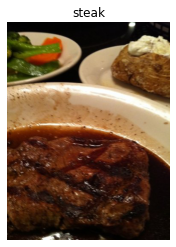

In [ ]:

# View a random image from the training dataset
img = view_random_image(target_dir="pizza_steak/train/",
                        target_class="steak")
     

* Run above cell 10 times to understand what we are training.

* You can see above our images are of 3 dimensional shape.

* This is because the way our computer sees the image is `in the form of a big array (tensor)`.



In [ ]:
# View the img (actually just a big array/tensor)
img
     

array([[[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [42, 33, 34],
        [49, 40, 41],
        [53, 44, 45]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [33, 24, 27],
        [37, 28, 29],
        [39, 30, 31]],

       [[ 4,  4,  4],
        [ 3,  3,  3],
        [ 3,  3,  3],
        ...,
        [25, 19, 21],
        [28, 19, 22],
        [29, 20, 23]],

       ...,

       [[19, 12,  4],
        [18, 11,  3],
        [18,  9,  2],
        ...,
        [ 9,  6,  1],
        [ 8,  5,  0],
        [ 7,  4,  0]],

       [[17, 10,  4],
        [17, 10,  4],
        [16,  9,  3],
        ...,
        [10,  7,  2],
        [10,  7,  2],
        [10,  7,  2]],

       [[16,  9,  3],
        [15,  8,  2],
        [15,  8,  2],
        ...,
        [14, 11,  6],
        [18, 15, 10],
        [22, 19, 14]]], dtype=uint8)

In [ ]:

# View the image shape
img.shape # returns (width, height, colour channels)

(512, 382, 3)

* it's actually in the form `(Width, Height, Colour Channels)`.

* Color Channels: RGB colors

* Most `common preprocessing steps` for working with images is to scale (also referred to as `normalize`) their pixel values by dividing the image arrays by 255.

In [ ]:
img/255. # Get all the values in between 0 and 1.

array([[[0.01568627, 0.01568627, 0.01568627],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.16470588, 0.12941176, 0.13333333],
        [0.19215686, 0.15686275, 0.16078431],
        [0.20784314, 0.17254902, 0.17647059]],

       [[0.01568627, 0.01568627, 0.01568627],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.12941176, 0.09411765, 0.10588235],
        [0.14509804, 0.10980392, 0.11372549],
        [0.15294118, 0.11764706, 0.12156863]],

       [[0.01568627, 0.01568627, 0.01568627],
        [0.01176471, 0.01176471, 0.01176471],
        [0.01176471, 0.01176471, 0.01176471],
        ...,
        [0.09803922, 0.0745098 , 0.08235294],
        [0.10980392, 0.0745098 , 0.08627451],
        [0.11372549, 0.07843137, 0.09019608]],

       ...,

       [[0.0745098 , 0.04705882, 0.01568627],
        [0.07058824, 0.04313725, 0.01176471],
        [0.07058824, 0

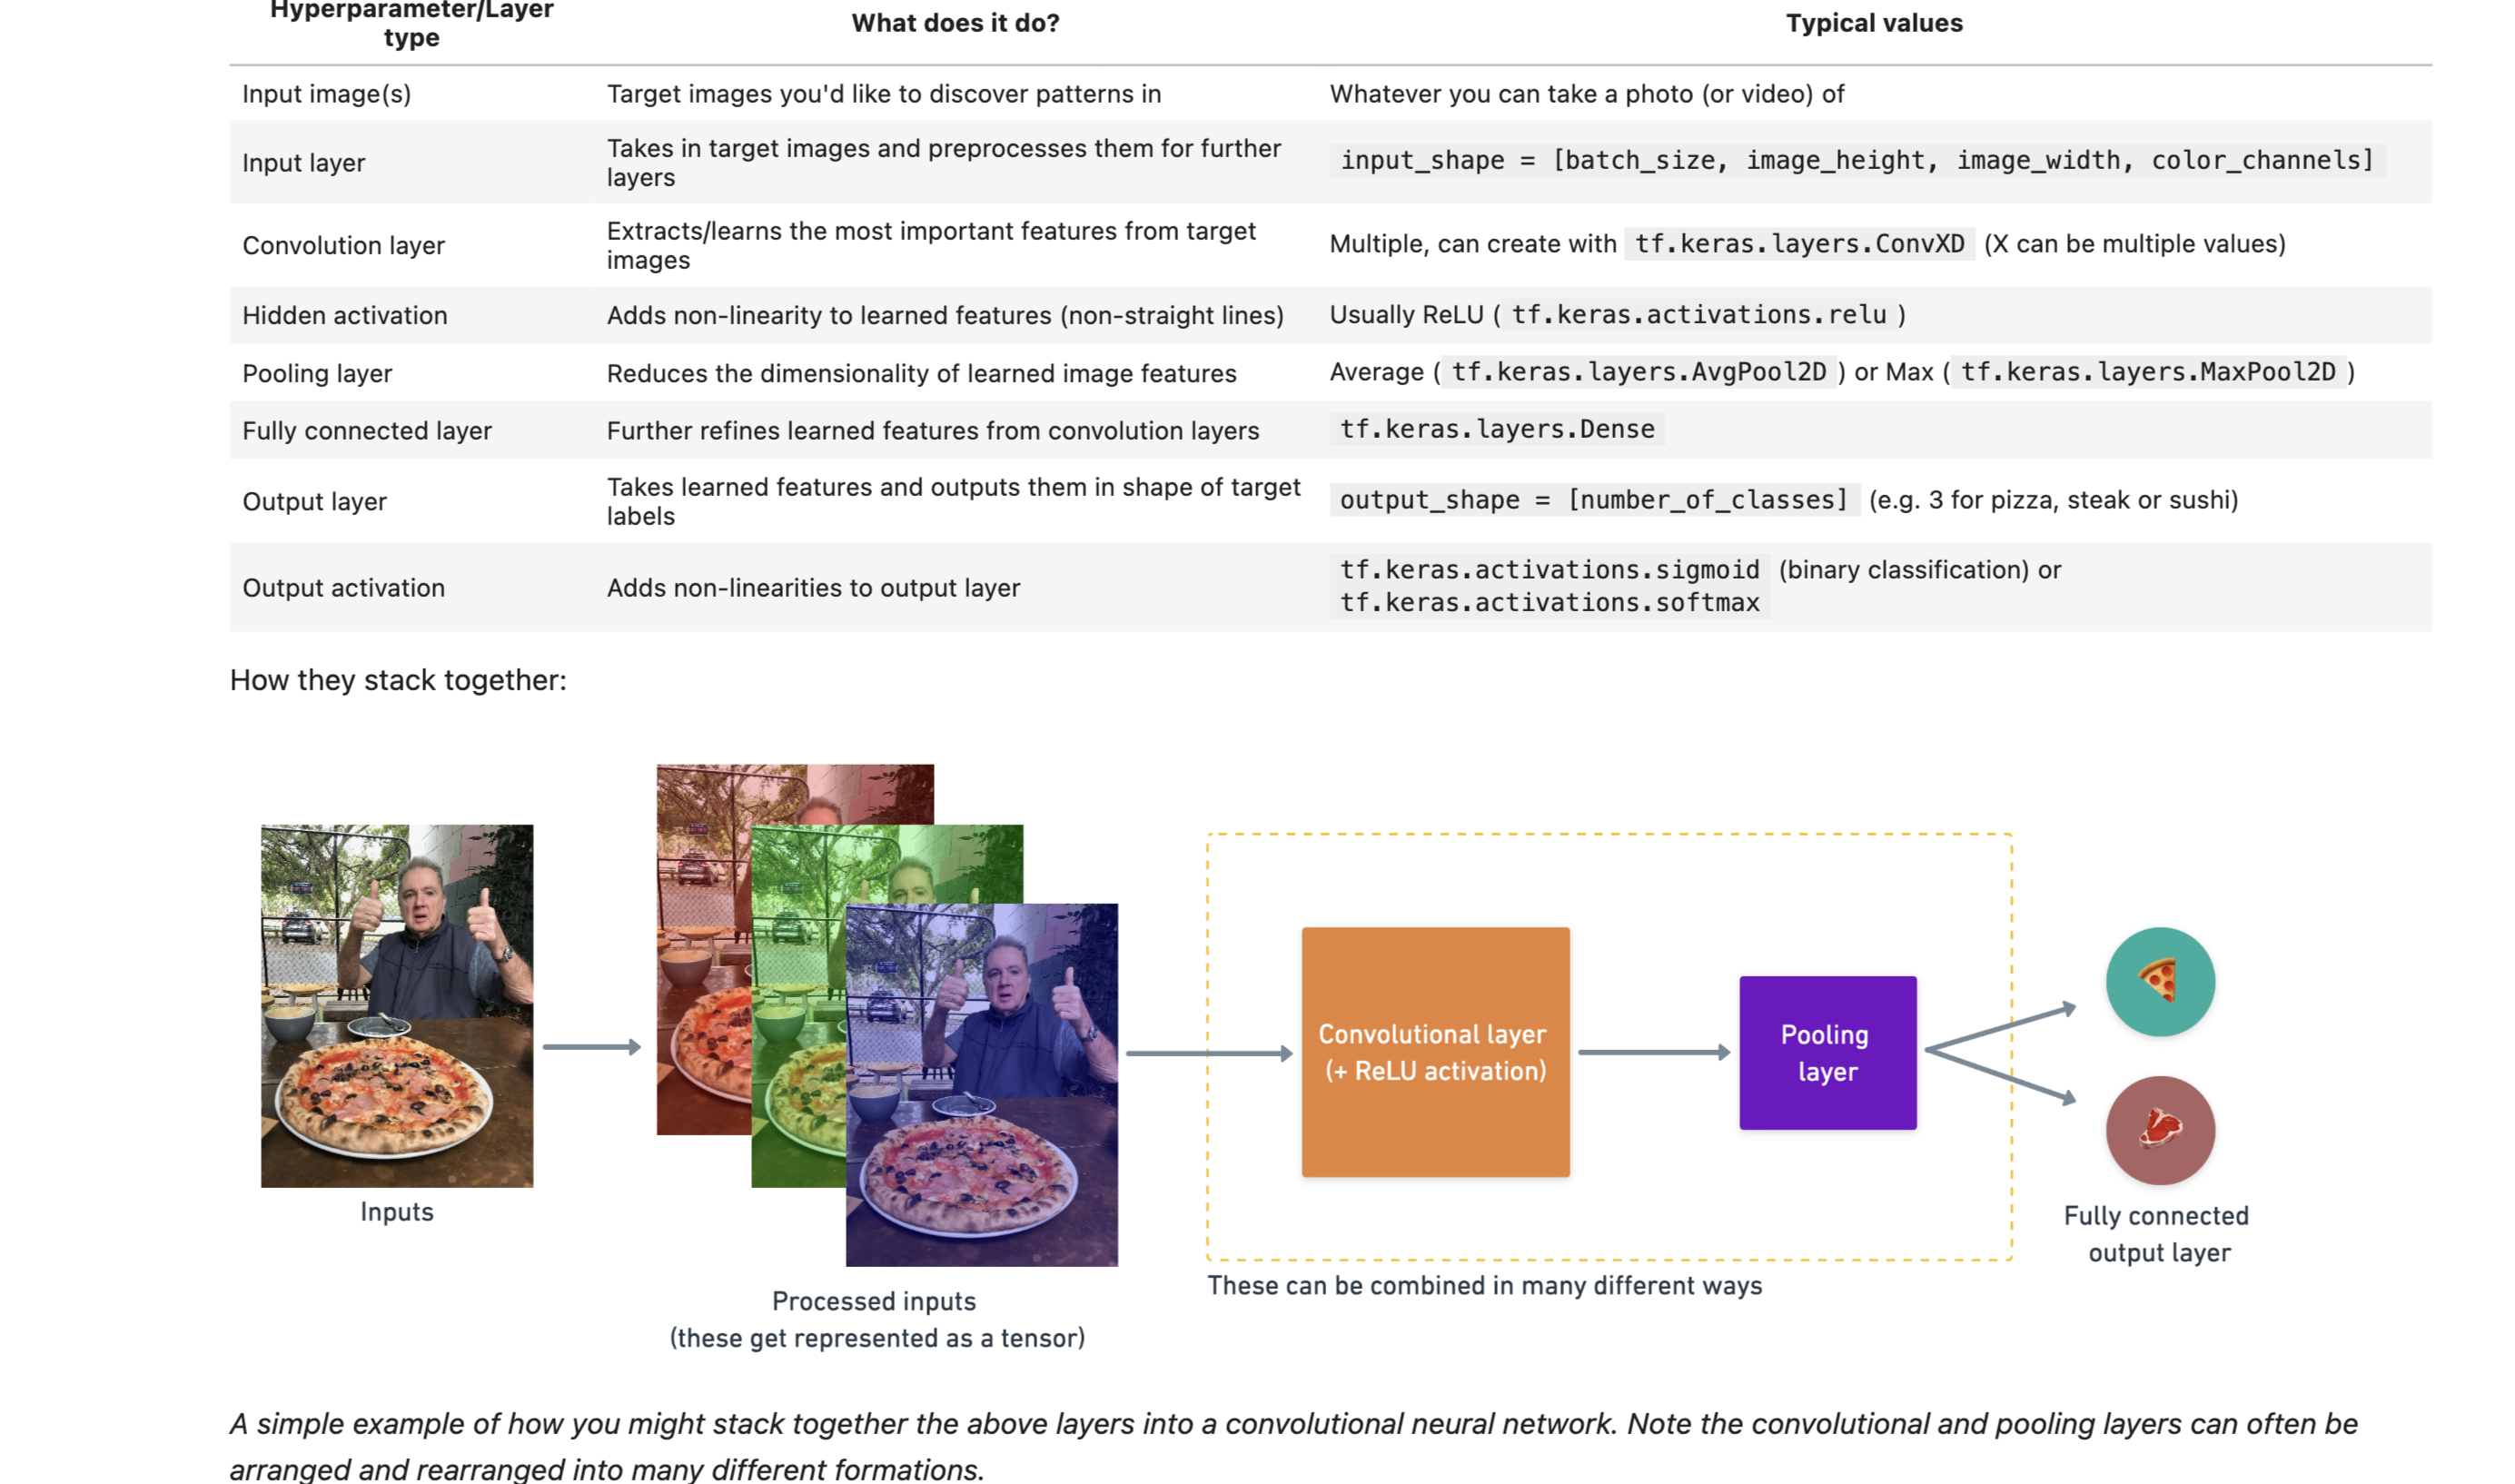

* We've checked out our data and found there's `750 training images`, as well as `250 test images per class` and they're all of various `different shapes`.

`NOTE:` A baseline is a score or evaluation metric you want to try and beat. Usually you'll start with a simple model, create a baseline and try to beat it by increasing the complexity of the model. A really fun way to learn machine learning is to find some kind of modelling paper with a published result and try to beat it.

The code in the following cell replicates and `end-to-end way to model` our pizza_steak dataset with a `convolutional neural network (CNN)`` using the components listed above.